In [3]:
import pandas as pd
import numpy as np
data = pd.read_excel('exam_data_more_realistic.xlsx')
data.head()

,exam1,exam2,pass
0,57.8,30.0,1
1,87.7,86.6,1
2,52.8,58.4,0
3,88.1,74.9,1
4,94.3,89.8,1


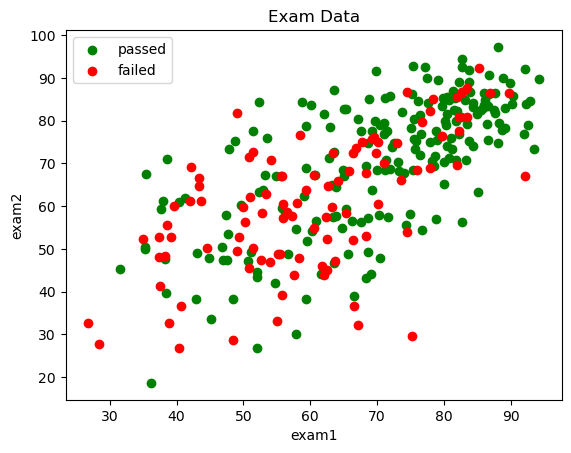

In [6]:
%matplotlib inline
from matplotlib import pyplot as plt
mask = data.loc[:,'pass']==1
fig1 = plt.figure()
passed=plt.scatter(data.loc[:,'exam1'][mask],data.loc[:,'exam2'][mask],color='green')
failed=plt.scatter(data.loc[:,'exam1'][~mask],data.loc[:,'exam2'][~mask],color='red')
plt.legend((passed,failed),('passed','failed'))
plt.title('Exam Data')
plt.xlabel('exam1')
plt.ylabel('exam2')
plt.show()

In [14]:
x = data[['exam1','exam2']]#x = data.iloc[:,0:2]左闭右开
y = data.loc[:,'pass']
x1 = data.loc[:,'exam1']
x2 = data.loc[:,'exam2']

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
LR1 = LogisticRegression()
LR1.fit(x,y)
y1_predict = LR1.predict(x)

accuracy_LR1 = accuracy_score(y,y1_predict)
print(accuracy_LR1)

0.65


In [42]:
new_data1 = pd.DataFrame({
    'exam1':[80],
    'exam2':[24]
})
y1_test = LR1.predict(new_data1)

new_data2 = pd.DataFrame({
    'exam1':[30],
    'exam2':[90]
})
y2_test = LR1.predict(new_data2)

new_data3 = pd.DataFrame({
    'exam1':[59],
    'exam2':[24]
})
y3_test = LR1.predict(new_data3)

new_data4 = pd.DataFrame({
    'exam1':[88],
    'exam2':[96]
})
y4_test = LR1.predict(new_data4)

new_data5= pd.DataFrame({
    'exam1':[50],
    'exam2':[61]
})
y5_test = LR1.predict(new_data5)

new_data6= pd.DataFrame({
    'exam1':[43],
    'exam2':[58]
})
y6_test = LR1.predict(new_data6)

tests = [y1_test, y2_test, y3_test, y4_test, y5_test, y6_test]

# 生成结果并打印
results = ['passed' if t else 'failed' for t in tests]
print(' '.join(results))


passed passed failed passed passed failed


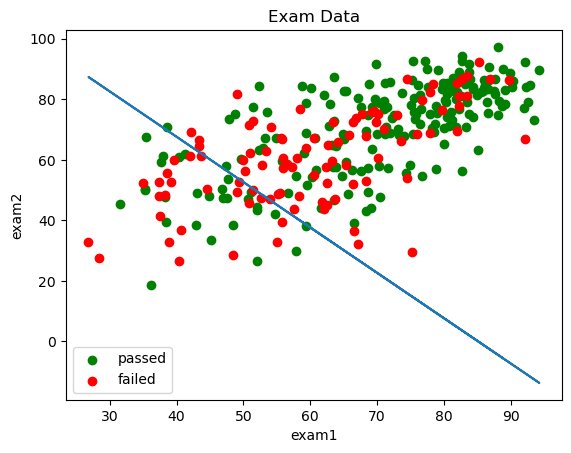

In [26]:
theta0 = LR1.intercept_
theta1,theta2 = LR1.coef_[0][0],LR1.coef_[0][1]
x2_boundary = -(theta0 + theta1 * x1)/theta2

fig2 = plt.figure()
passed=plt.scatter(data.loc[:,'exam1'][mask],data.loc[:,'exam2'][mask],color='green')
failed=plt.scatter(data.loc[:,'exam1'][~mask],data.loc[:,'exam2'][~mask],color='red')
plt.plot(x1,x2_boundary)
plt.legend((passed,failed),('passed','failed'))
plt.title('Exam Data')
plt.xlabel('exam1')
plt.ylabel('exam2')
plt.show()

In [35]:
x1_2 = x1*x1
x2_2 = x2*x2
x1_x2 = x1*x2
x_new = {'x1':x1,'x2':x2,'x1_2':x1_2,'x2_2':x2_2,'x1_x2':x1_x2}
X_new= pd.DataFrame(x_new)

LR2 = LogisticRegression(solver='liblinear')
#LR2 = LogisticRegression()会出警告，表明优化过程未能在预设的迭代次数内收敛。
LR2.fit(X_new,y)
#print(LR2.feature_names_in_)
#print(X_new)

LogisticRegression(solver='liblinear')

In [37]:
y2_predict = LR2.predict(X_new)
accuracy_LR2 = accuracy_score(y,y2_predict)
print(accuracy_LR2)

0.67


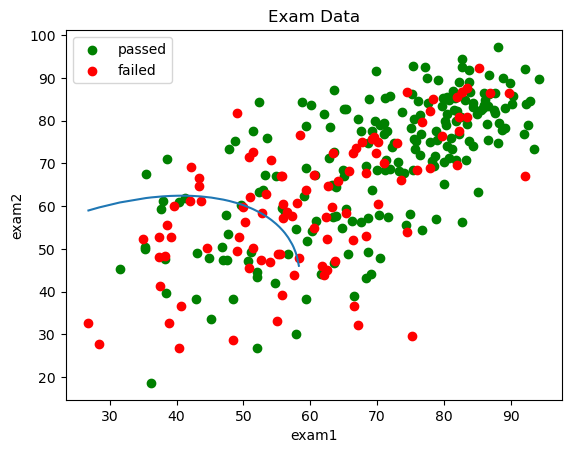

In [39]:
X1_new = x1.sort_values()
theta0 = LR2.intercept_
theta1,theta2,theta3,theta4,theta5 = LR2.coef_[0][0],LR2.coef_[0][1],LR2.coef_[0][2],LR2.coef_[0][3],LR2.coef_[0][4]
a = theta4
b = theta5*X1_new+theta2
c = theta0+theta1*X1_new+theta3*X1_new*X1_new
X2_SO_boundary = (-b+np.sqrt(b*b-4*a*c))/(2*a)

fig3 = plt.figure()
passed=plt.scatter(data.loc[:,'exam1'][mask],data.loc[:,'exam2'][mask],color='green')
failed=plt.scatter(data.loc[:,'exam1'][~mask],data.loc[:,'exam2'][~mask],color='red')
plt.plot(X1_new,X2_SO_boundary)
plt.legend((passed,failed),('passed','failed'))
plt.title('Exam Data')
plt.xlabel('exam1')
plt.ylabel('exam2')
plt.show()

In [43]:
print(theta1,theta2,theta3,theta4,theta5)

-0.019813545606917615 -0.019057184861550114 0.0006700342495792833 0.0005908213678867229 -0.0005575704493985802


In [41]:
new_data1 = pd.DataFrame({
    'exam1':[80],
    'exam2':[24]
})
y1_test = LR1.predict(new_data1)

new_data2 = pd.DataFrame({
    'exam1':[30],
    'exam2':[90]
})
y2_test = LR1.predict(new_data2)

new_data3 = pd.DataFrame({
    'exam1':[59],
    'exam2':[24]
})
y3_test = LR1.predict(new_data3)

new_data4 = pd.DataFrame({
    'exam1':[88],
    'exam2':[96]
})
y4_test = LR1.predict(new_data4)

new_data5= pd.DataFrame({
    'exam1':[50],
    'exam2':[61]
})
y5_test = LR1.predict(new_data5)

new_data6= pd.DataFrame({
    'exam1':[43],
    'exam2':[58]
})
y6_test = LR1.predict(new_data6)

print('passed' if y1_test else 'failed',end=' ')
print('passed' if y2_test else 'failed',end=' ')
print('passed' if y3_test else 'failed',end=' ')
print('passed' if y4_test else 'failed',end=' ')
print('passed' if y5_test else 'failed',end=' ')
print('passed' if y6_test else 'failed',end=' ')

passed passed failed passed passed failed 